## Análisis de datos - Clase 4

### Discretización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# Cargamos el dataset de ejemplo (penguins)
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
# Seleccionamos una variable continua para discretizar
variable = "bill_length_mm"

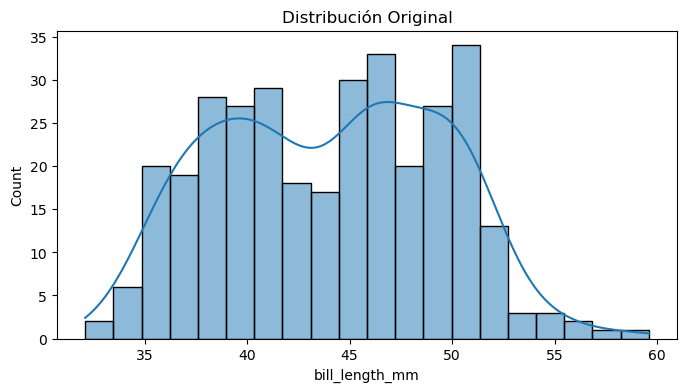

In [4]:
# Visualizamos la distribución original
fig, ax = plt.subplots(figsize=(8,4))

sns.histplot(penguins[variable], bins=20, kde=True, ax=ax)
ax.set_title("Distribución Original")
plt.show()

#### Función auxiliar para mostrar resultados

In [5]:
def plot(new_var):
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))
    sns.histplot(data=penguins, x=variable, hue=new_var, multiple="stack", bins=30, palette="Set2", ax=axes[0])
    axes[0].set_title(f"Histograma por categoría ({new_var})")
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel("Frecuencia")

    sns.scatterplot(data=penguins, x=penguins.index, y=variable, hue=new_var, palette="Set2", ax=axes[1])
    axes[1].set_title('Discretización')
    axes[1].set_ylabel("Categoría")
    axes[1].set_xlabel(variable)

    sns.countplot(x=new_var, data=penguins, hue=new_var, palette="Set2", ax=axes[2])
    axes[2].set_xlabel("Categoría")
    axes[2].set_ylabel("Cantidad de pingüinos")
    axes[2].set_title("Distribución de pingüinos según longitud de pico")

    plt.tight_layout()
    plt.show()

#### Por intervalos iguales

In [6]:
# Discretización por intervalos de igual amplitud
penguins["equal_width"] = pd.cut(penguins[variable], bins=4, labels=["Corto", "Medio", "Largo", "Muy Largo"])
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Medio
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Medio
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Medio
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Corto
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,Medio
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,Corto
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,Medio
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female,Medio
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,Corto
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,Corto


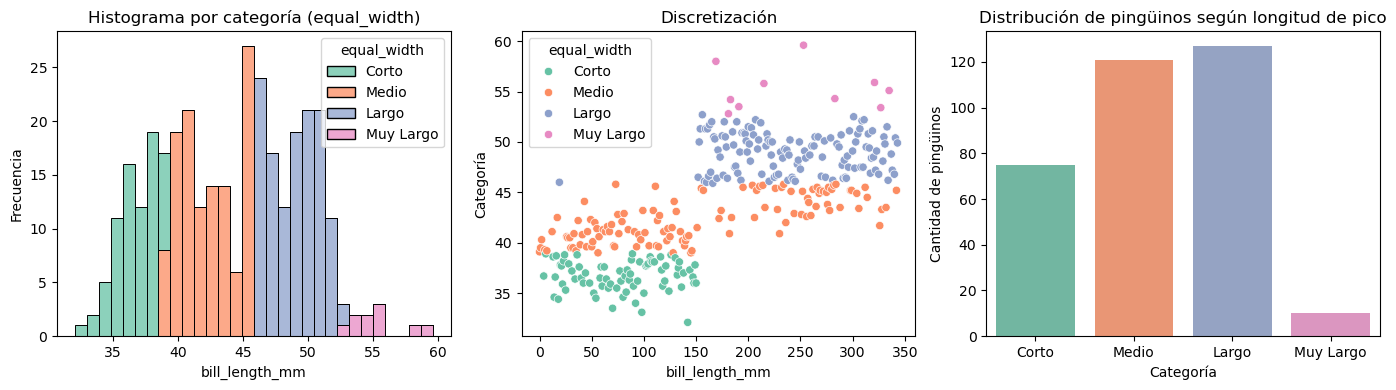

In [7]:
plot('equal_width')

#### por intervalos de igual frecuencia

In [8]:
# Discretización por intervalos de igual frecuencia
penguins["equal_freq"], bins = pd.qcut(penguins[variable], q=4, labels=["Muy Corto", "Corto", "Medio", "Largo"], retbins=True)
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width,equal_freq
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Medio,Muy Corto
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Medio,Muy Corto
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Medio,Corto
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Corto,Muy Corto
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,Medio,Muy Corto
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,Corto,Muy Corto
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,Medio,Muy Corto
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female,Medio,Corto
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,Corto,Muy Corto
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,Corto,Muy Corto


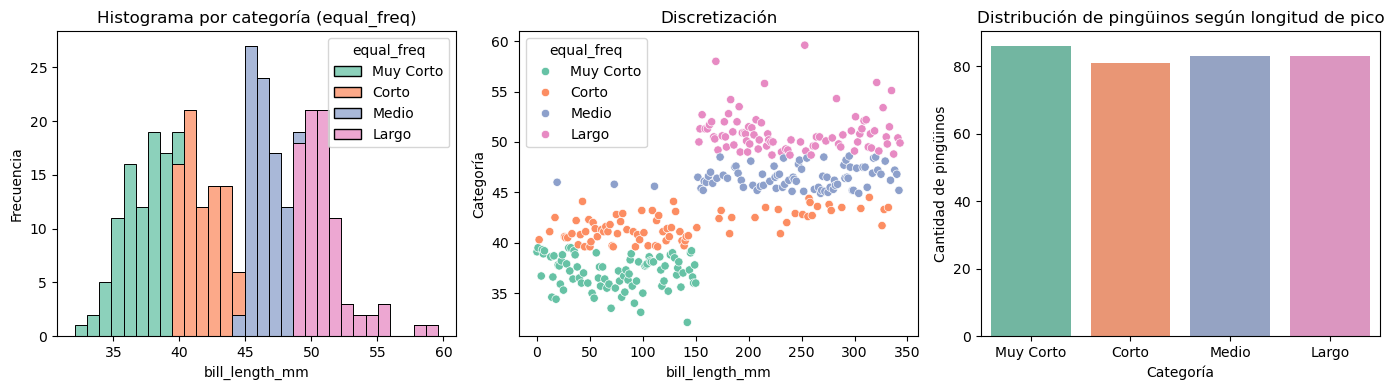

In [9]:
plot('equal_freq')

#### Discretización por puntos de corte

In [10]:
# Cuantiles
kbin_quantile = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
penguins["kbin_quantile"] = kbin_quantile.fit_transform(penguins[[variable]]).astype(int)
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width,equal_freq,kbin_quantile
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Medio,Muy Corto,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Medio,Muy Corto,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Medio,Corto,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Corto,Muy Corto,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,Medio,Muy Corto,0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,Corto,Muy Corto,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,Medio,Muy Corto,0
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female,Medio,Corto,1
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,Corto,Muy Corto,0
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,Corto,Muy Corto,0


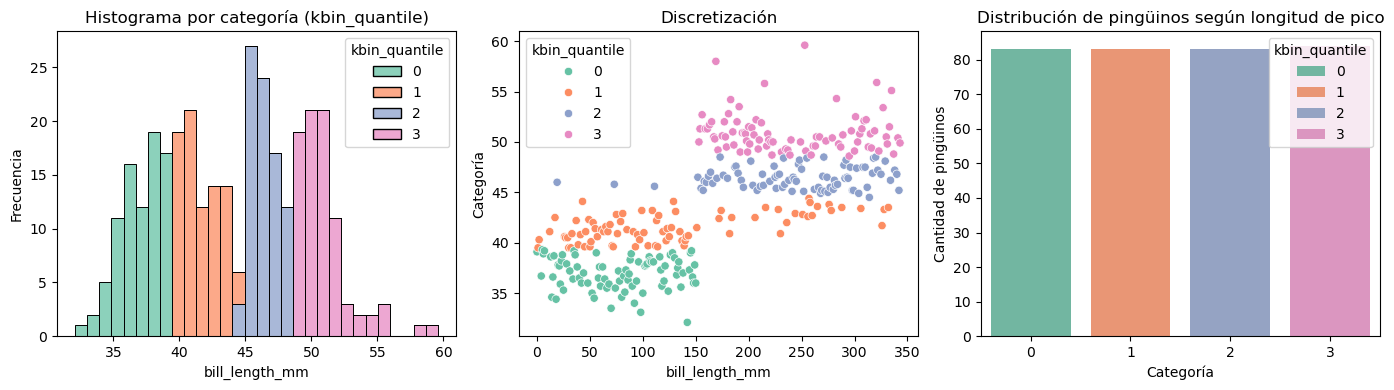

In [11]:
plot('kbin_quantile')

#### Con K-means

In [12]:
# K-means
kbin_kmeans = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
penguins["kbin_kmeans"] = kbin_kmeans.fit_transform(penguins[[variable]]).astype(int)
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width,equal_freq,kbin_quantile,kbin_kmeans
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Medio,Muy Corto,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Medio,Muy Corto,1,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Medio,Corto,1,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Corto,Muy Corto,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,Medio,Muy Corto,0,1
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,Corto,Muy Corto,0,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,Medio,Muy Corto,0,1
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female,Medio,Corto,1,1
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,Corto,Muy Corto,0,0
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,Corto,Muy Corto,0,0


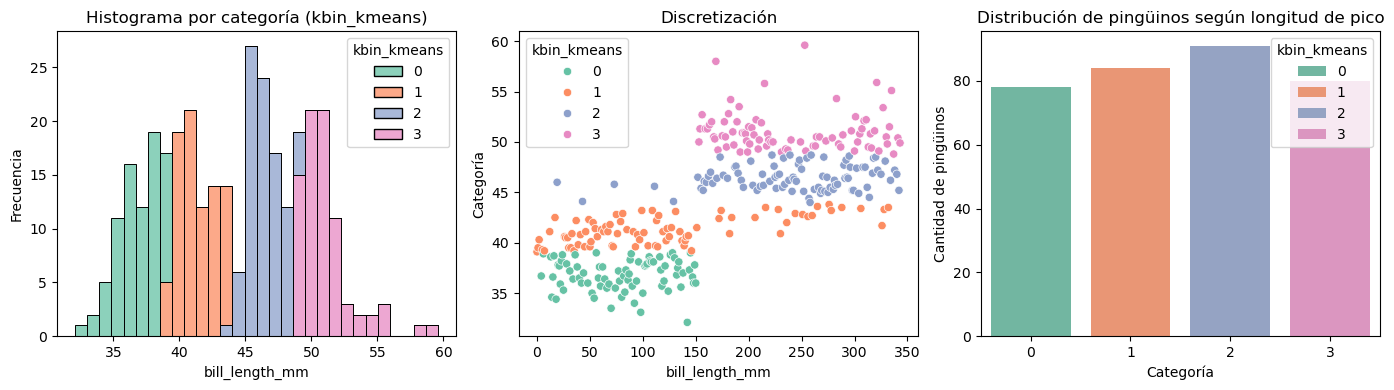

In [13]:
plot('kbin_kmeans')

#### Comparación de resultados

In [14]:
# Resultados
penguins_disc = penguins[[variable, "equal_width", "equal_freq", "kbin_quantile", "kbin_kmeans"]]
penguins_disc

,bill_length_mm,equal_width,equal_freq,kbin_quantile,kbin_kmeans
0,39.1,Medio,Muy Corto,0,1
1,39.5,Medio,Muy Corto,1,1
2,40.3,Medio,Corto,1,1
4,36.7,Corto,Muy Corto,0,0
5,39.3,Medio,Muy Corto,0,1
...,...,...,...,...,...
338,47.2,Largo,Medio,2,2
340,46.8,Largo,Medio,2,2
341,50.4,Largo,Largo,3,3
342,45.2,Medio,Medio,2,2


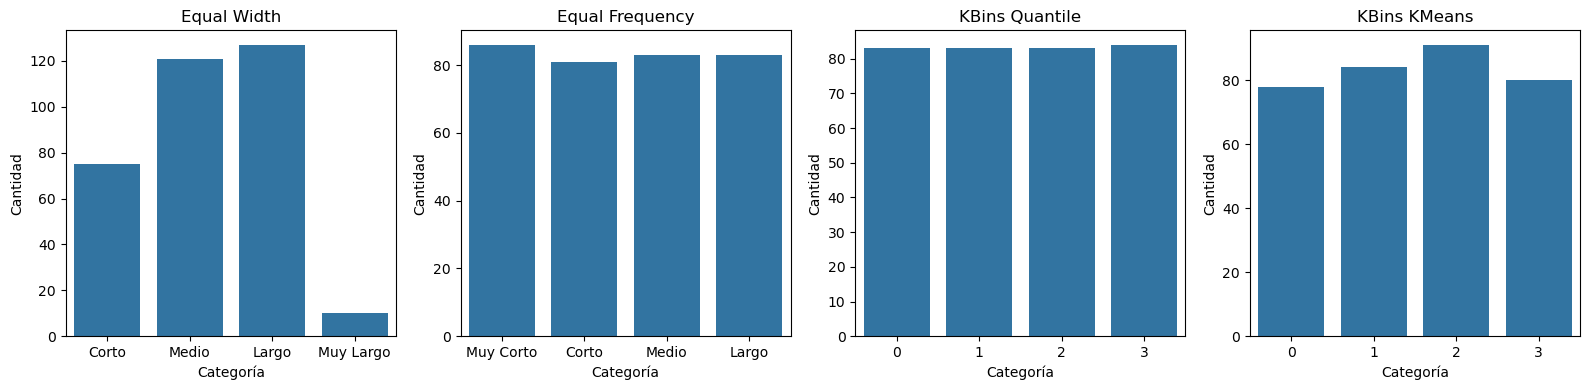

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

cols = ["equal_width", "equal_freq", "kbin_quantile", "kbin_kmeans"]
titles = ["Equal Width", "Equal Frequency", "KBins Quantile", "KBins KMeans"]

for i, col in enumerate(cols):
    sns.countplot(x=col, data=penguins, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Categoría")
    axes[i].set_ylabel("Cantidad")

fig.tight_layout()
plt.show()
